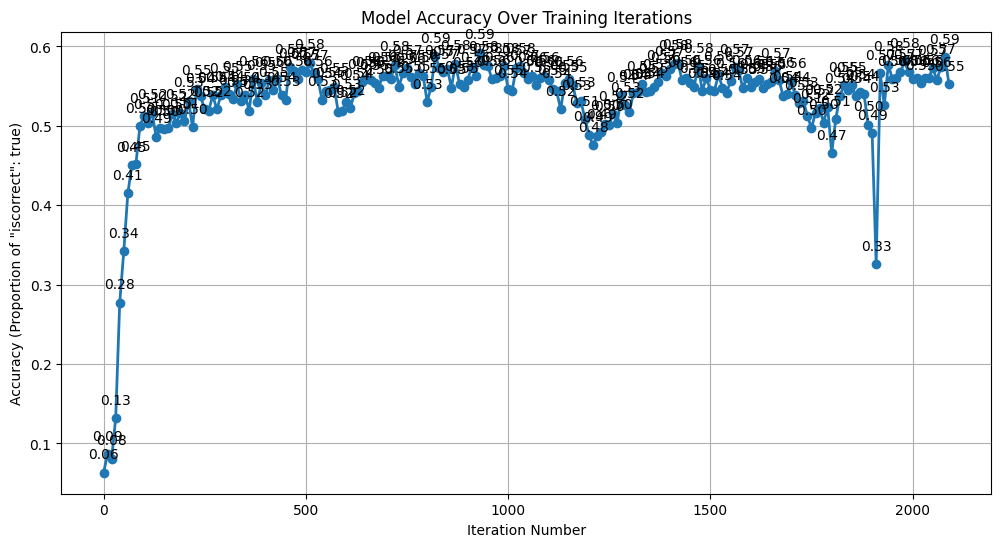


Iter	Accuracy	File
--------------------------------------------------------------------------------
0	0.0632	../orz_ckpt/debug_orz_7b_ppo/eval_output_iter0_math5000.0920_aime20240.0000_gpqa_diamond0.0000.jsonl
10	0.0865	../orz_ckpt/debug_orz_7b_ppo/eval_output_iter10_math5000.1240_aime20240.0333_gpqa_diamond0.0000.jsonl
20	0.0810	../orz_ckpt/debug_orz_7b_ppo/eval_output_iter20_math5000.1140_aime20240.0333_gpqa_diamond0.0051.jsonl
30	0.1319	../orz_ckpt/debug_orz_7b_ppo/eval_output_iter30_math5000.1860_aime20240.0000_gpqa_diamond0.0152.jsonl
40	0.2775	../orz_ckpt/debug_orz_7b_ppo/eval_output_iter40_math5000.3720_aime20240.0000_gpqa_diamond0.0808.jsonl
50	0.3420	../orz_ckpt/debug_orz_7b_ppo/eval_output_iter50_math5000.4320_aime20240.0333_gpqa_diamond0.1616.jsonl
60	0.4148	../orz_ckpt/debug_orz_7b_ppo/eval_output_iter60_math5000.5300_aime20240.0333_gpqa_diamond0.1818.jsonl
70	0.4505	../orz_ckpt/debug_orz_7b_ppo/eval_output_iter70_math5000.5860_aime20240.0667_gpqa_diamond0.1667.jsonl
80	0.

In [3]:
import os
import glob
import json
import re
import matplotlib.pyplot as plt
import numpy as np

# 定义文件路径模式
eval_files_pattern = "../orz_ckpt/debug_orz_7b_ppo/eval_output_iter*.jsonl"

# 用于存储结果的字典
results = []

# 查找所有匹配的文件
eval_files = glob.glob(eval_files_pattern)

for file_path in eval_files:
    # 从文件名提取iter值
    iter_match = re.search(r'iter(\d+)_', file_path)
    if iter_match:
        iter_num = int(iter_match.group(1))
        
        # 读取文件并计算正确率
        correct_count = 0
        total_count = 0
        
        with open(file_path, 'r') as f:
            for line in f:
                if line.strip():  # 确保行不为空
                    try:
                        data = json.loads(line.strip())
                        if data.get("iscorrect") is True:
                            correct_count += 1
                        total_count += 1
                    except json.JSONDecodeError:
                        print(f"Error parsing JSON in file {file_path}")
                        continue
        
        # 计算正确率
        accuracy = correct_count / total_count if total_count > 0 else 0
        
        # 存储结果
        results.append({
            'iter': iter_num,
            'accuracy': accuracy,
            'file': file_path
        })

# 按iter排序结果
results.sort(key=lambda x: x['iter'])

# 提取绘图数据
iters = [r['iter'] for r in results]
accuracies = [r['accuracy'] for r in results]

# 创建图表
plt.figure(figsize=(12, 6))
plt.plot(iters, accuracies, 'o-', linewidth=2)
plt.xlabel('Iteration Number')
plt.ylabel('Accuracy (Proportion of "iscorrect": true)')
plt.title('Model Accuracy Over Training Iterations')
plt.grid(True)

# 添加数据点标签
for i, accuracy in enumerate(accuracies):
    plt.annotate(f'{accuracy:.2f}', 
                 (iters[i], accuracies[i]),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

# 保存图表
# plt.savefig('accuracy_vs_iterations.png')
plt.show()

# 打印结果表格
print("\nIter\tAccuracy\tFile")
print("-" * 80)
for r in results:
    print(f"{r['iter']}\t{r['accuracy']:.4f}\t{r['file']}") 

In [ ]:
import os
import re
import pandas as pd

def extract_metrics(directory):
    # 正则表达式匹配文件名中的指标
    pattern = r'eval_output_iter(\d+)_math5000\.([\d]+)_aime2024\.([\d]+)_gpqa_diamond\.([\d]+)_needlebench_atc\.([\d]+)\.jsonl'
    
    results = []
    
    # 遍历目录中的所有文件
    for filename in os.listdir(directory):
        match = re.match(pattern, filename)
        if match:
            # 提取所有指标
            iter_num = int(match.group(1))
            math5000 = float(f"0.{match.group(2)}")
            aime2024 = float(f"0.{match.group(3)}")
            gpqa_diamond = float(f"0.{match.group(4)}")
            needlebench_atc = float(f"0.{match.group(5)}")
            
            results.append({
                'iteration': iter_num,
                'math5000': math5000,
                'aime2024': aime2024,
                'gpqa_diamond': gpqa_diamond,
                'needlebench_atc': needlebench_atc
            })
    
    # 转换为DataFrame并按迭代次数排序
    df = pd.DataFrame(results)
    df = df.sort_values('iteration')
    
    # 保存为CSV
    output_file = 'training_metrics.csv'
    df.to_csv(output_file, index=False)
    print(f"结果已保存到 {output_file}")
    
    return df

# 使用示例
directory = "orz_ckpt/debug_orz_7b_ppo_needlebench_mix_math_instruct"
df = extract_metrics(directory)
print("\n前几行数据预览：")
print(df.head())